## Mall Customers Dataset.
<b> So, we have a dataset of "Mall_Customers.csv", which is the data of customers who visit the mall and spend there. In this article, we are going to segment these customers based on the details given, by using Machine Learning algorithms. The algorithms included K-means Clustering Algorithm.


## Step - 1 : Business Problem Understanding
<b> <b> There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given.
    
<b> Create a model that can help to segment these customers based on the details given, by using Machine Learning algorithms.
    

    

<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'data' object and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
data = pd.read_csv("Mall_Customers.csv")

# Display the first 5 lines using the head() method.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2.2 Data Understanding


<b> Mall_Customers.csv : Which is the data of customers who visit the mall and spend there. Contains variables:
    
- Customer_Id: Customers unique id's.

- Gender: Gender of the customers.

- Age: Age of the customers.

- Annual Income (k$): Annual Income of the customers in thousands dollar.

- Spending Score (1-100): Score given based on spending.



<b> Let’s have a look at data dimensionality.

In [3]:
data.shape

(200, 5)

<b> From the output, we can see that the table contains 200 rows and 5 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<b> int64 and object are the data types of our features. We see 4 features are numeric (features are int64) and 1 feature is categorical.  With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 200 observations, the same number of rows we saw before with shape. 
   

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA) and Data Visualization


<b> The describe method shows basic statistical characteristics of each numerical feature (int64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<b> Checking the unique values/categories from the "Age" variable.

In [6]:
# Finding the number of males and females in the data
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<b> Now visualising the number of males and females in the data.

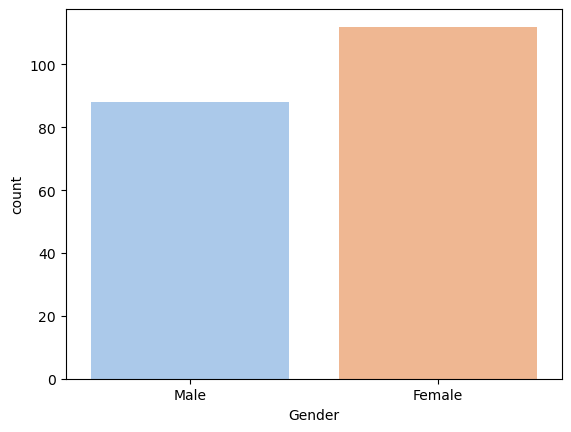

In [7]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, we can see that the number of females customers is more than the number of male customers.
    
<b> Computing minimum and maximum age of customers.

In [8]:
# Computing minimum and maximum age of customers
print(min(data.Age))
print(max(data.Age))

18
70


<b> Now visualising the age distribution of customers.

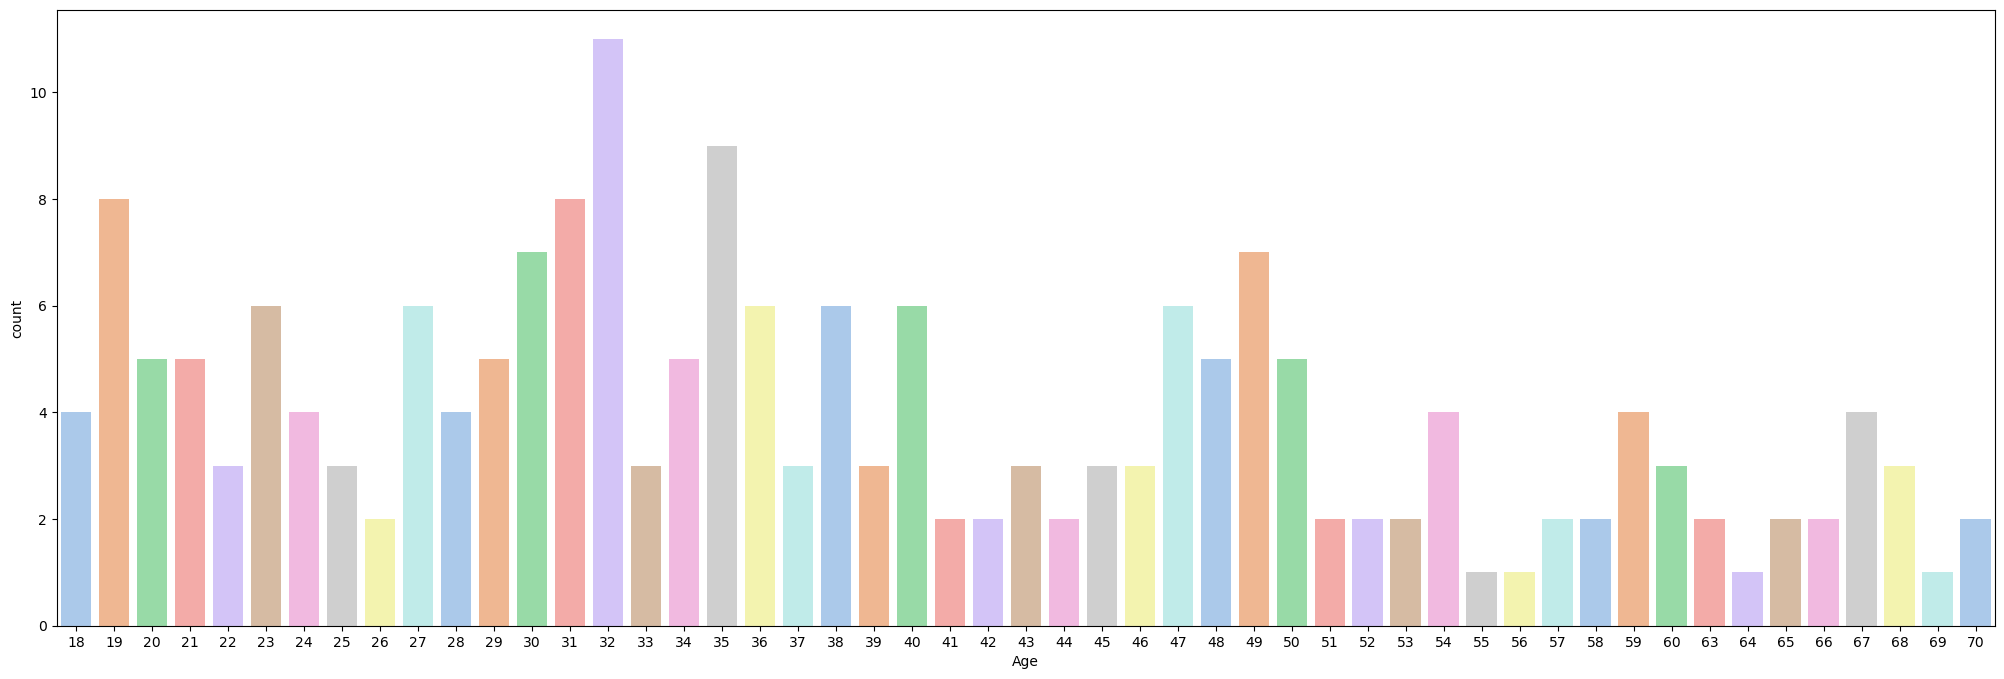

In [9]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, Customers with age 32 make for the largest number of customers.

<b> Now use the value_counts method on target variable (species).

<b> Now visualising the income distribution of customers.

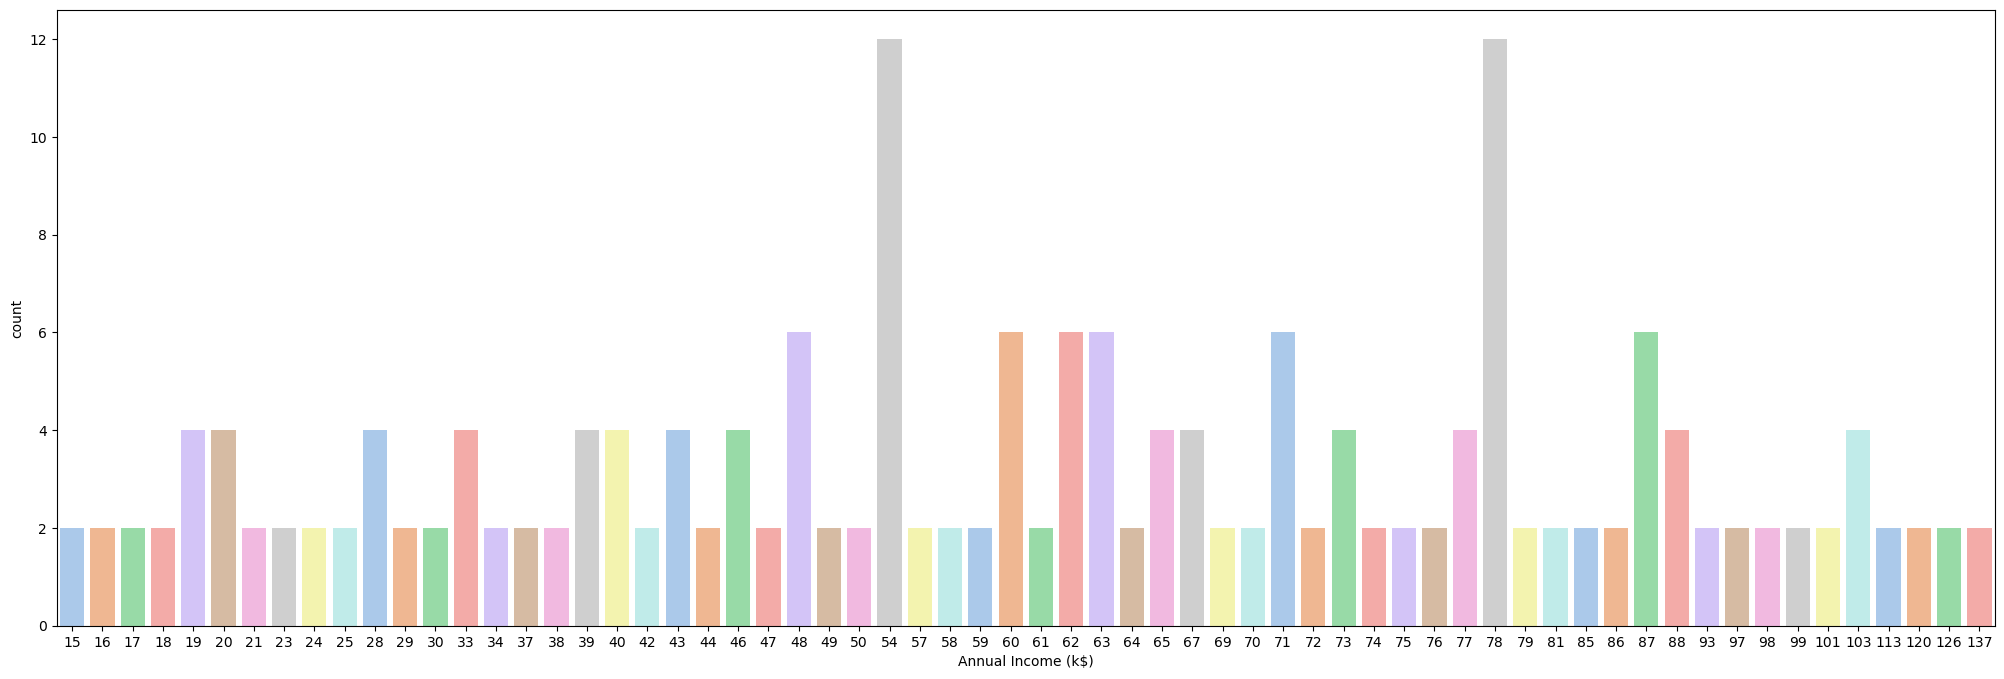

In [10]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, Customers with annual income of 54k and 78k make for the largest number of customers.

<b> Visualising the spending score of customers.

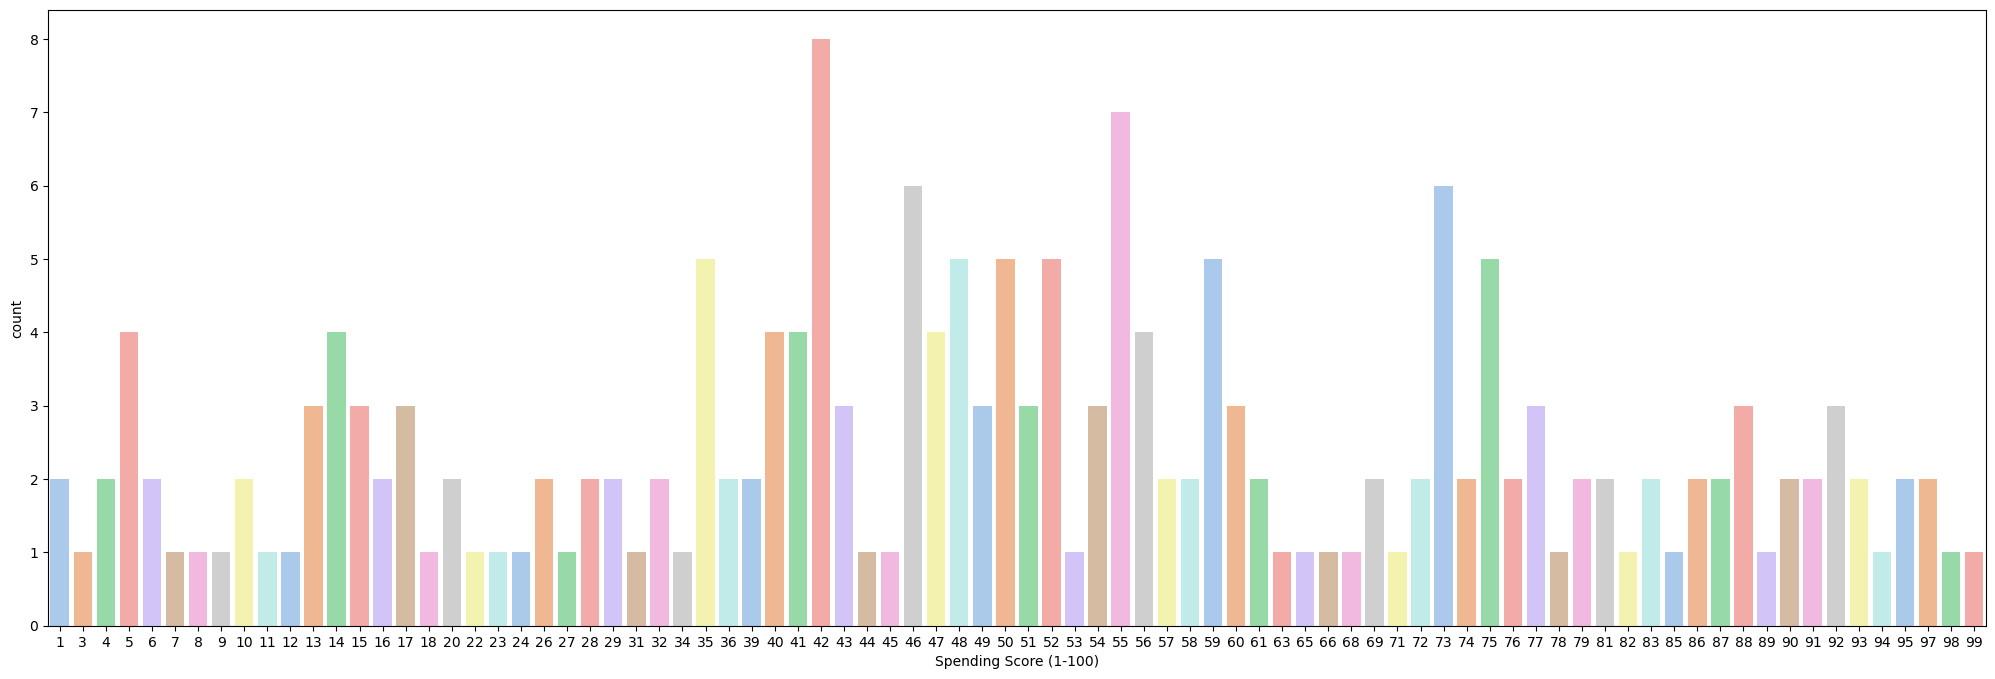

In [11]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=data,palette="pastel")

# Display all figures.
plt.show()

<b> From the above plot, The maximum spending score is 42.

<b> Finding correaltion between all the parameters in the dataset.

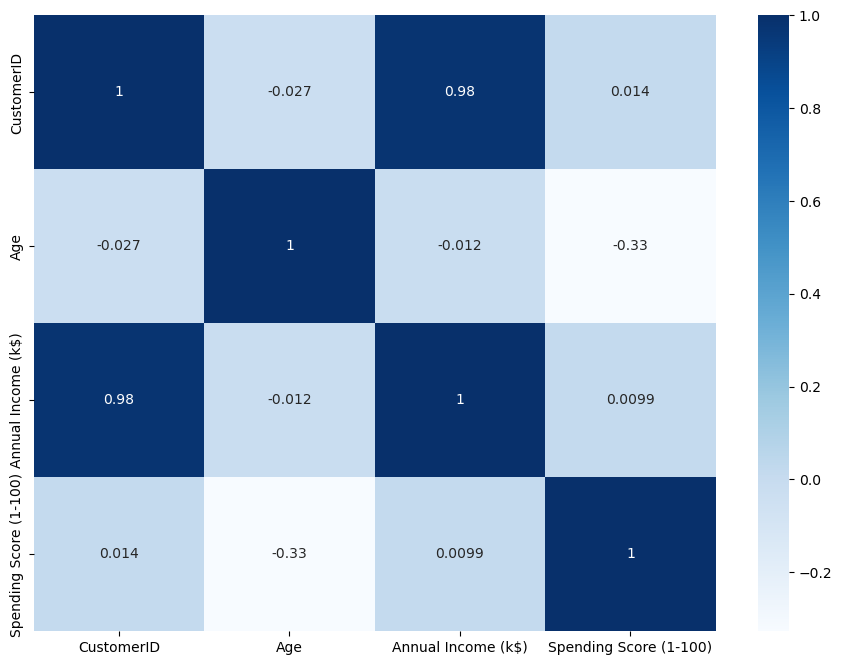

In [12]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)

# Display all figures.
plt.show()

<b> Based on the above correlation matrix, now making clusters based on Annual income and Spending Score.

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [13]:
# Check the missing values records.
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> In the above, we can see that there is no missing values.

### 3.3 Extracting Independent Variables.
    
<b> Here we don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine. So we will just add a line of code for the matrix of features.

In [14]:
# Create x variable.
x = data.iloc[:, [3, 4]].values                                                      

<b> As we can see, we are extracting only 3rd and 4th feature. It is because we need a 2d plot to visualize the model, and some features are not required, such as customer_id, Age and Gender.

## Step-4: Finding the optimal number of clusters using the "Elbow method".
In this step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed earlier, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

In [15]:
# Finding optimal number of clusters using the elbow method.

# import the KMeans from sklearn.cluster library.
from sklearn.cluster import KMeans 

# Initializing the list for the values of WCSS  
wcss = []

# Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  # creating object kmeans of class KMeans()
    kmeans.fit(x)                                                      # Fit the KMeans
    wcss.append(kmeans.inertia_)                                       # Append the WCSS value.
    
    
# Print the WCSS list
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21850.165282585636, 19672.07284901432]


As we can see in the above code, we have used the KMeans class of sklearn. cluster library to form the clusters.

Next, we have created the wcss variable to initialize an empty list, which is used to contain the value of wcss computed for different values of k ranging from 1 to 10.

After that, we have initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value. After that, applied the KMeans and fitted on "x" object, then appended the i value to the wcss list and printed the list.

<b> Now plotting the graph between the number of clusters and WCSS.

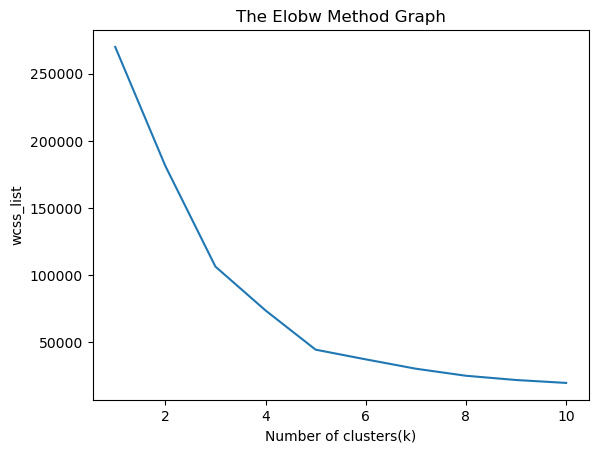

In [16]:
# plotting the graph between the number of clusters and WCSS.
# Pass the x value as range 1 to 10 and y value as wcss list.
plt.plot(range(1, 11), wcss)  
plt.title('The Elobw Method Graph')      # Title name 
plt.xlabel('Number of clusters(k)')      # Xlabel name
plt.ylabel('wcss_list')                  # Ylabel name
plt.show()                               # Display the plot

<b> From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

## Step - 5 : K-means Modelling (Training the K-means algorithm on the training dataset):
As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed. The code is given below:

In [17]:
# Modelling
# Training the K-means model on a dataset.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)    # creating object kmeans of class KMeans()

# Predict
y_predict= kmeans.fit_predict(x)


The first line is the same as above for creating the object of KMeans class.

In the second line of code, we have created the dependent variable y_predict to train the model. By executing the above lines of code, we will get the y_predict variable.


Now displaying the y_predict.

In [18]:
# print the y_predict
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

<b> Creating the "y_predict" to DataFrame as "cluster" and same storing in the data object.

In [19]:
# Creating the "y_predict" to DataFrame as "cluster" and same storing in the "data" object.
data["cluster"] = pd.DataFrame(y_predict)

# print the dataset.
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


<b> From the above image, now we can relate to the each customers belongs to a which cluster, as we can see CustomerID 1 belongs to a cluster 2. Like that we can compare the each customers.

## Step - 6 : Visualizing the Clusters
<b> Before clustering visualizing the plot.
    
To visualize the plot will use scatter plot using plt.scatter() function of matplotlib.

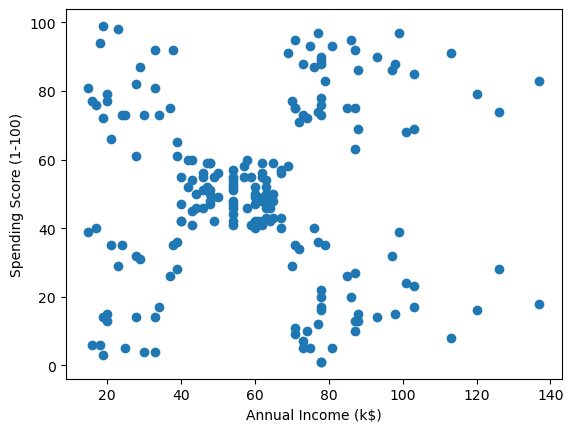

In [20]:
# Draw the scatter plot before clustering.

# pass the x = "Annual Income" as "a" and y = "Spending Score" as "b"
a = data.iloc[:,3]
b = data.iloc[:,4]

# Draw the scatter plot
plt.scatter(a,b)
plt.xlabel('Annual Income (k$)')                  # Xlabel name
plt.ylabel('Spending Score (1-100)')              # Ylabel name

# Display all figures.
plt.show()

<b> After clustering visualizing the plot.
    
The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using plt.scatter() function of matplotlib.

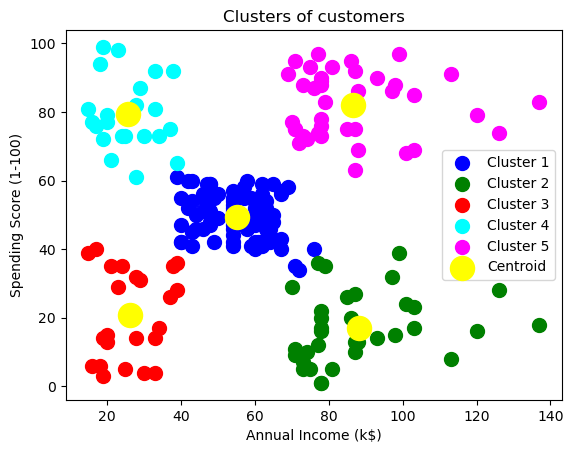

In [21]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')    # for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')   # for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')      # for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')    # for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') # for fifth cluster  

# plot the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid') 

plt.title('Clusters of customers')                                                                   # Title name
plt.xlabel('Annual Income (k$)')                                                                     # Xlabel name
plt.ylabel('Spending Score (1-100)')                                                                 # Ylabel name
plt.legend()  
plt.show()                                                                                           # Display all figures.

In above lines of code, we have written code for each clusters, ranging from 1 to 5. The first coordinate of the plt.scatter, i.e., x[y_predict == 0, 0] containing the x value for the showing the matrix of features values, and the y_predict is ranging from 0 to 1.

The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

a. High Income, High Spending Score (Cluster 5): Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.


b. High Income, Low Spending Score (Cluster 2): Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.


c. Average Income, Average Spending Score (Cluster 1): Can target these set of customers by providing them with low cost EMI's etc.


d. Low Income, High Spending Score (Cluster 4): May or may not target these group of customers based on the policy of the mall.


e. Low Income, Low Spending Score (Cluster 3): Don't target these customers since they have less income and need to save money.

## Step - 7 : K-Means Model Evaluation:
<b> Calculate Silhouette score for K-Means clusters with n_clusters = 5
    
<b> silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
    
<b> silhouette_samples (sklearn.metrics) provides the Silhouette scores for each sample of different clusters.

In [22]:
# Calculate Silhoutte Score for K-Means Modelling

# import the silhouette_score class from sklearn.metrics library.
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(x, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


As we can see in the above code, we have used the silhouette_score class of sklearn,metrics library to form the score. In the second line, we have calculated silhouette score for K-Means clusters with n_clusters = 5. The parameters of silhouette score as:
    
- X: An array of pairwise distances between samples, or a feature array (independent variables).
    
    
- labels_ : Predicted labels for each sample.
    
    
- metricstr (default=’euclidean’): The metric to use when calculating distance between instances in a feature array.
    
    
And finally printed the Mean Silhouette Coefficient for all samples. So the Silhouetter Score=0.554, based on the score we conclude that we have got a best (good) model for this dataset on n_clusters=5. 
    
    
**Note:** The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.    
    